Imports

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.dates as md
from functools import reduce

This dataset contains at least 210 countries, it presented below on the impact of the COVID-19 pandemic on the global economy of each country.

Note :

CODE
COUNTRY
DATE
HDI : human_development_index
TC : total_cases
TD : total_deaths
STI : stringency_index
POP : population
GDPCAP : gdp_per_capita

In [209]:
data = pd.read_csv('transformed_data.csv')
data.head(5)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [210]:
data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y-%m-%d')

## Human Development Index (HDI)

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

Reference :http://hdr.undp.org/en/content/human-development-index-hdi

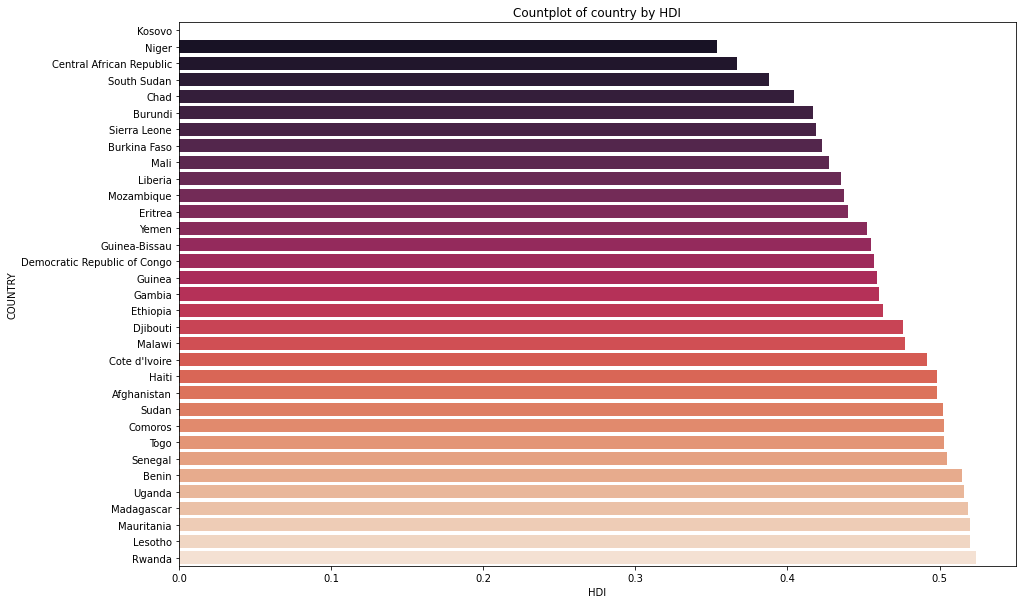

In [211]:
et = data.sort_values(by='HDI', ascending=True)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.HDI, palette="rocket")
plt.xticks()
plt.xlabel('HDI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by HDI')
plt.show()

## Stringency Index ?
- It is among the metrics being used by the Oxford COVID-19 Government Response Tracker.
- The Tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
- These indicators examine containment policies such as school and workplace closings, public events, public transport, stay-at-home policies.
- The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.
Reference : https://www.civilsdaily.com/news/what-is-stringency-index/

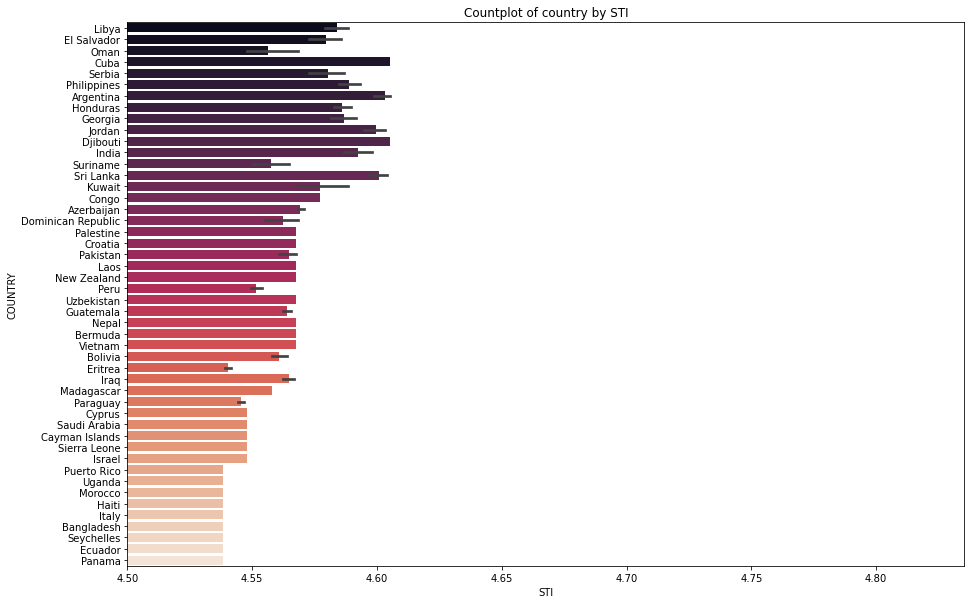

In [253]:
et = data.sort_values(by='STI', ascending=False)[:2000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.STI, palette='rocket')
plt.xticks()
plt.xlim(xmin=4.5)
plt.xlabel('STI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by STI')
plt.show()

In [213]:
data['STI'].mean()

3.1788969163848186

# The impact of the COVID-19 pandemic on the global economy of each country

In [214]:
@interact
def impact(country=sorted(set(data['COUNTRY']))):
    y = data[['CODE','COUNTRY','DATE','HDI','TC','TD','STI','POP','GDPCAP']][data["COUNTRY"] == country]
    y = y.sort_values(by="CODE",ascending=False)
    return y.head(5)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [215]:
@interact
def data_show(country=sorted(set(data['COUNTRY']))):
    HDI= data[data['COUNTRY']==country]['HDI'].max() * 10
    GDPCAP = data[data['COUNTRY']==country]['GDPCAP'].max()
    POP= data[data['COUNTRY']==country]['POP'].max()

    total1= [HDI, GDPCAP, POP]

    TD= data[data['COUNTRY']==country].groupby(['DATE']).agg({'TD':['sum']})
    TC = data[data['COUNTRY']==country].groupby(['DATE']).agg({'TC':['sum']})
    STI = data[data['COUNTRY']==country].groupby(['DATE']).agg({'STI':['sum']})

    total2 = TD.join(TC).join(STI)

    plt.figure(figsize=(15,10))
    plt.subplot(121)
    names = ['HDI','GDPCAP', 'POP']
    plt.bar(names, total1)
    plt.ylabel("Counts", size=13)

    plt.subplot(122)
    total2.plot(ax=plt.gca(), title=country)
    plt.ylabel("Counts", size=13)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

# GDPCAP and the STI in a global level

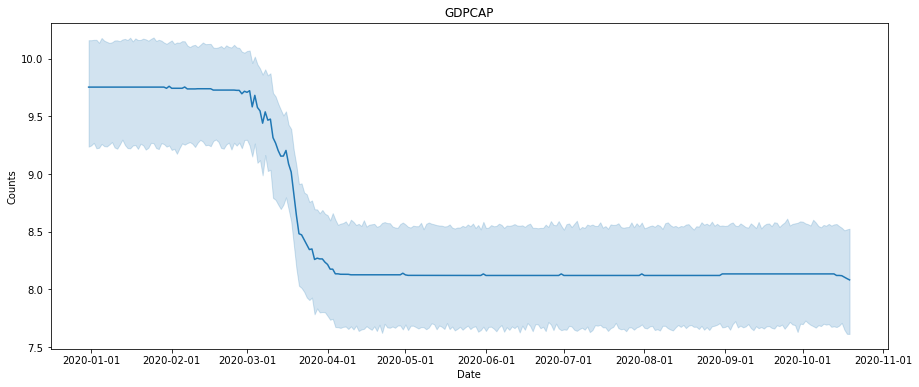

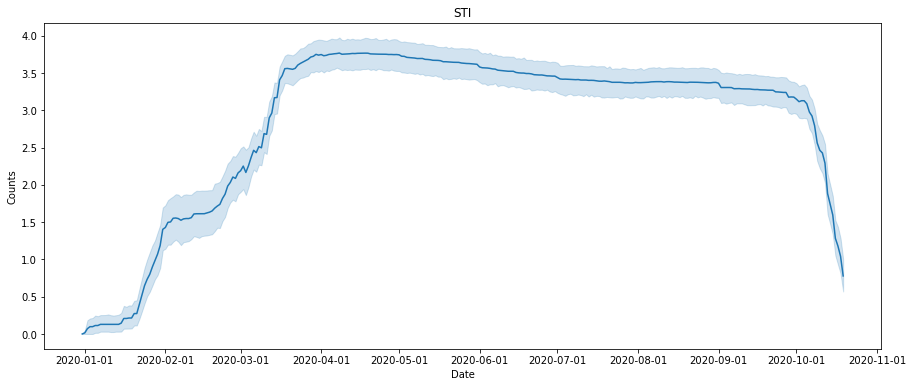

In [216]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["DATE"], data["GDPCAP"])

ax.set_title("GDPCAP")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["DATE"], data["STI"])

ax.set_title("STI")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

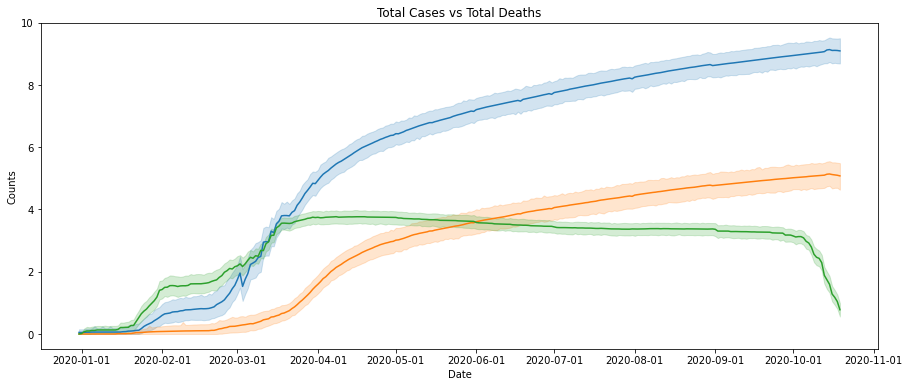

In [284]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(x=data["DATE"], y=data["TC"])
sns.lineplot(x=data["DATE"], y=data["TD"])
sns.lineplot(x=data["DATE"], y=data["STI"])

ax.set_title("Total Cases vs Total Deaths")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))